In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
#train = pd.read_csv('E:/Engineering/TnP/Projects/DataScience/Credit-Card-Lead-Prediction-master/dataset/train_s3TEQDk.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_s3TEQDk.csv')

In [4]:
train.shape

(245725, 11)

In [5]:
train_dup = train.head(2000)

In [6]:
train_dup['Serial_Number'] = range(1, len(train_dup) + 1)

<ipython-input-6-8f62cee70403>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dup['Serial_Number'] = range(1, len(train_dup) + 1)


In [7]:
train_dup.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Serial_Number
1995,R8X3WVEH,Female,85,RG261,Other,X2,45,No,1648742,Yes,0,1996
1996,YD88FRVI,Male,55,RG280,Self_Employed,X3,97,No,511803,Yes,0,1997
1997,MTKQDYRB,Male,57,RG281,Self_Employed,X2,39,No,667695,No,0,1998
1998,NN4ARGB5,Male,49,RG256,Self_Employed,X2,19,NaN,1044886,Yes,1,1999
1999,JVYKRBKG,Male,85,RG268,Other,X3,98,Yes,379852,No,0,2000


In [8]:
train_dup.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Serial_Number
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,43.682500,46.071000,1.103683e+06,0.238000,1000.500000
std,14.730281,31.915549,8.212390e+05,0.425966,577.494589
min,24.000000,7.000000,1.416430e+05,0.000000,1.000000
25%,30.000000,20.000000,6.012835e+05,0.000000,500.750000
50%,43.000000,32.000000,8.785320e+05,0.000000,1000.500000
75%,53.000000,69.000000,1.362287e+06,0.000000,1500.250000
max,85.000000,133.000000,8.256124e+06,1.000000,2000.000000


In [9]:
train_dup.isnull().sum()

ID                       0
Gender                   0
Age                      0
Region_Code              0
Occupation               0
Channel_Code             0
Vintage                  0
Credit_Product         220
Avg_Account_Balance      0
Is_Active                0
Is_Lead                  0
Serial_Number            0
dtype: int64

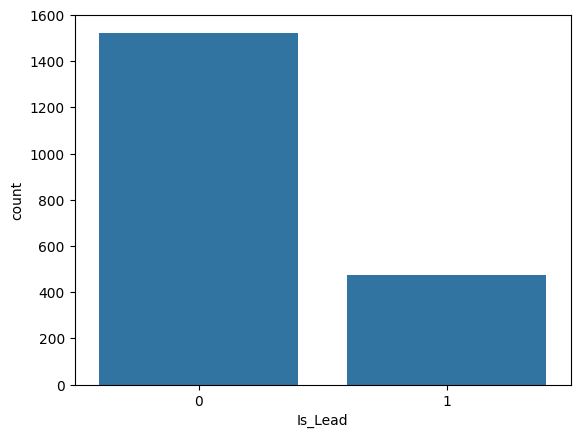

In [10]:
sns.countplot(x='Is_Lead', data=train_dup)
plt.show()

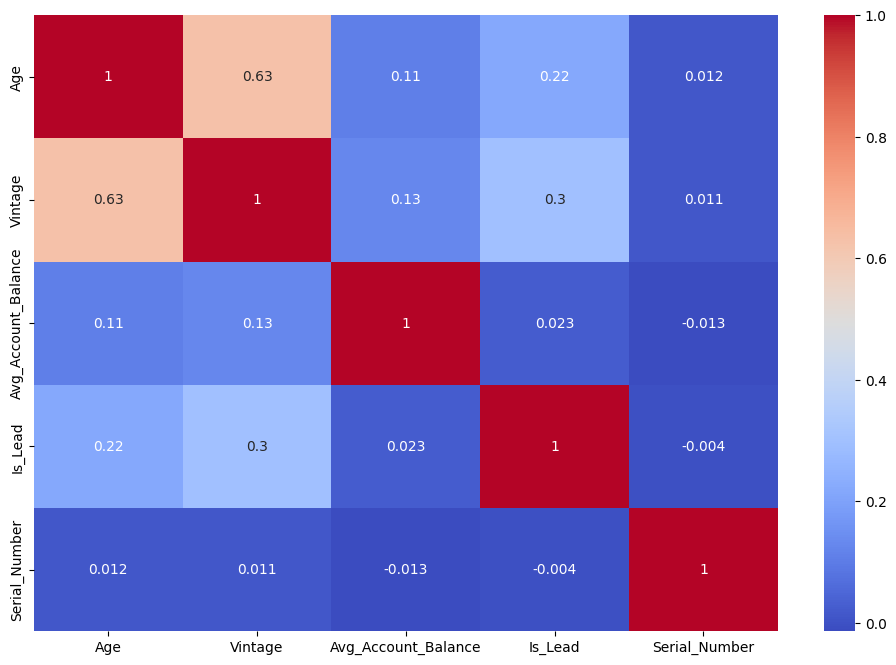

In [11]:
numeric_train_dup = train_dup.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_train_dup.corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
#train_dup.fillna("missing", inplace=True)

In [13]:
train_dup.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Serial_Number'],
      dtype='object')

In [14]:
train_dup_encoded = pd.get_dummies(train_dup[['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead']], drop_first=True)

In [15]:
#train_dup = pd.get_dummies(train_dup, drop_first=True)
train_dup = pd.get_dummies(train_dup, drop_first=True)#, sparse=True)

In [16]:
train_dup.shape

(2000, 2047)

In [17]:
train_dup

,Age,Vintage,Avg_Account_Balance,Is_Lead,Serial_Number,ID_245FELDT,ID_24TWNPYJ,ID_25GBTWNE,ID_26IVNPEJ,ID_26JMFBCU,...,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,73,43,1045696,0,1,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,30,32,581988,0,2,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,56,26,1484315,0,3,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
3,34,19,470454,0,4,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,30,33,886787,0,5,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,85,45,1648742,0,1996,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1996,55,97,511803,0,1997,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1997,57,39,667695,0,1998,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1998,49,19,1044886,1,1999,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True


In [18]:
x_train = train_dup.drop('Is_Lead', axis=1)
y_train = train_dup['Is_Lead']
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=200, random_state=42)

In [19]:
# Standardising the features
scaler = StandardScaler()
train_dup = scaler.fit_transform(train_dup)

# train_dup = normalize(train_dup)
# #X = normalize(X)
# train_dup

In [20]:
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (1800, 2046)
x_test shape (200, 2046)
y_train shape (1800,)
y_test shape (200,)


In [21]:
model_LR = LogisticRegression().fit(x_train, y_train)

LR_pred = model_LR.predict(x_test)
print(LR_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]


In [22]:
print(confusion_matrix(y_test, LR_pred))
print(round(accuracy_score(y_test, LR_pred),2)*100)

[[144   7]
 [ 43   6]]
75.0


In [23]:
logacc = accuracy_score(y_test, LR_pred)
logf1score = f1_score(y_test, LR_pred)
logrecall = recall_score(y_test, LR_pred)
logbal = balanced_accuracy_score(y_test, LR_pred)

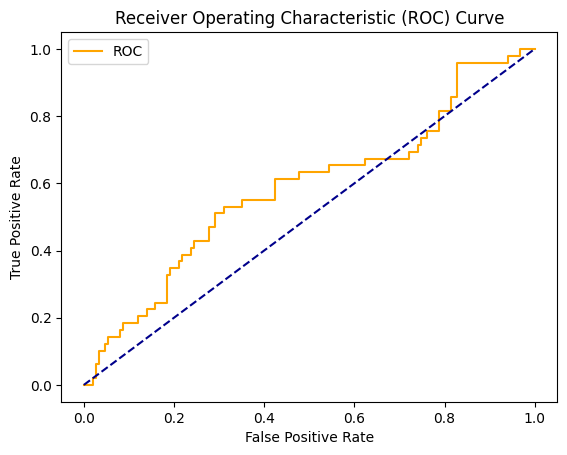

AUC-ROC : 0.5837275307473982


In [24]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = model_LR.predict_proba(x_test)
probs = probs[:, 1]
lrauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",lrauc)

In [25]:
nb = GaussianNB().fit(x_train, y_train)

nb_pred = nb.predict(x_test)
print(nb_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [26]:
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)

[[147   4]
 [ 49   0]]
74.0


In [27]:
nbacc = accuracy_score(y_test, nb_pred)
nbf1score = f1_score(y_test, nb_pred)
nbrecall = recall_score(y_test, nb_pred)
nbbal = balanced_accuracy_score(y_test, nb_pred)

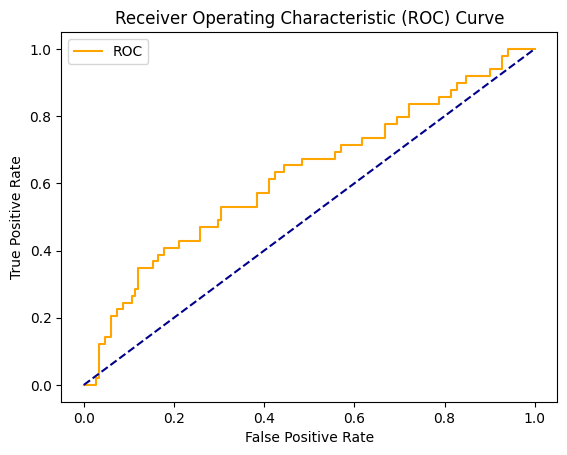

AUC-ROC : 0.6241383970806866


In [28]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = nb.predict_proba(x_test)
probs = probs[:, 1]
nbauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",nbauc)

In [29]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)

dtc_pred = dtc.predict(x_test)
print(dtc_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [30]:
print(confusion_matrix(y_test, dtc_pred))
print(round(accuracy_score(y_test, dtc_pred),2)*100)

[[143   8]
 [ 41   8]]
76.0


In [31]:
dtcacc = accuracy_score(y_test, dtc_pred)
dtcf1score = f1_score(y_test, dtc_pred)
dtcrecall = recall_score(y_test, dtc_pred)
dtcbal = balanced_accuracy_score(y_test, dtc_pred)

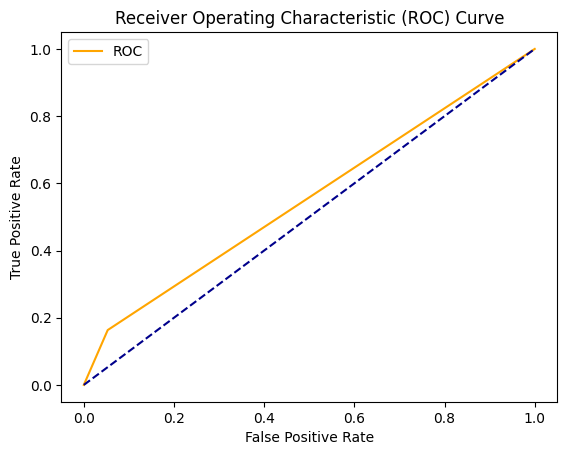

AUC-ROC : 0.5551425868360589


In [32]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = dtc.predict_proba(x_test)
probs = probs[:, 1]
dtcauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",dtcauc)

In [33]:
rfc = RandomForestClassifier().fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)
print(rfc_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)

[[150   1]
 [ 46   3]]
76.0


In [35]:
rfcacc = accuracy_score(y_test, rfc_pred)
rfcf1score = f1_score(y_test, rfc_pred)
rfcrecall = recall_score(y_test, rfc_pred)
rfcbal = balanced_accuracy_score(y_test, rfc_pred)

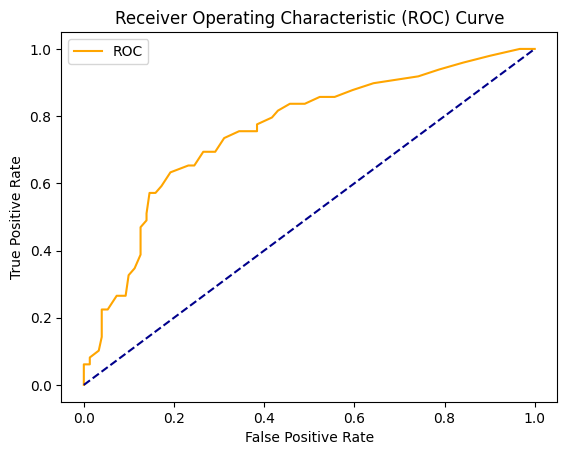

AUC-ROC : 0.7583457223949183


In [36]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = rfc.predict_proba(x_test)
probs = probs[:, 1]
rfcauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",rfcauc)

In [37]:
svc = SVC(probability=True)


In [38]:
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)
print(svc_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
print(confusion_matrix(y_test, svc_pred))
print(round(accuracy_score(y_test, svc_pred),2)*100)

[[151   0]
 [ 49   0]]
76.0


In [40]:
svcacc = accuracy_score(y_test, svc_pred)
svcf1score = f1_score(y_test, svc_pred)
svcrecall = recall_score(y_test, svc_pred)
svcbal = balanced_accuracy_score(y_test, svc_pred)

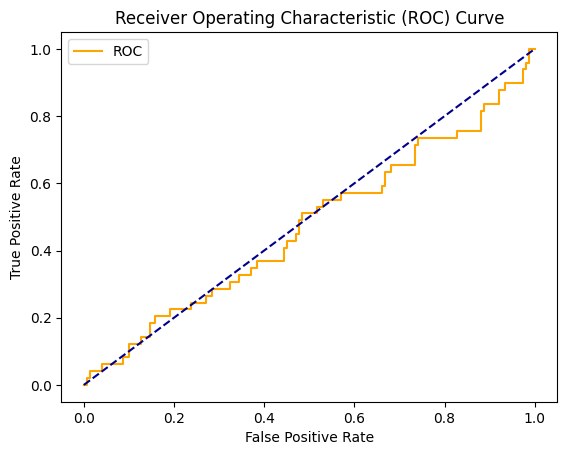

AUC-ROC : 0.4723611298824165


In [41]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = svc.predict_proba(x_test)
probs = probs[:, 1]
svcauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",svcauc)

In [42]:
knn = KNeighborsClassifier().fit(x_train, y_train)

knn_pred = knn.predict(x_test)
print(knn_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [43]:
print(confusion_matrix(y_test, knn_pred))
print(round(accuracy_score(y_test, knn_pred), 2) * 100)

[[139  12]
 [ 44   5]]
72.0


In [44]:
knnacc = accuracy_score(y_test, knn_pred)
knnf1score = f1_score(y_test, knn_pred)
knnrecall = recall_score(y_test, knn_pred)
knnbal = balanced_accuracy_score(y_test, knn_pred)

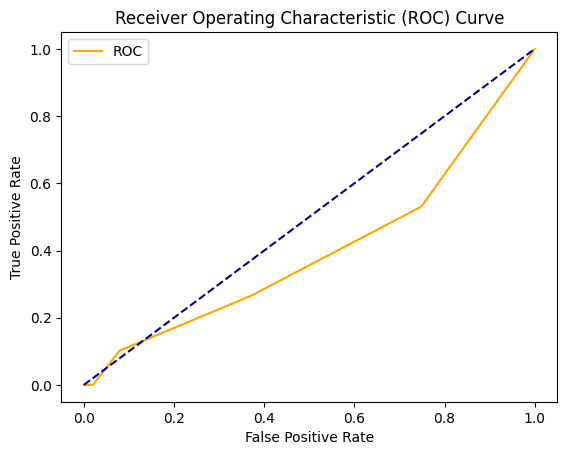

AUC-ROC: 0.39937829436410327


In [45]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = knn.predict_proba(x_test)
probs = probs[:, 1]
knn_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC:", knn_auc)

In [46]:
models = [('Logistic Regression', logacc, logf1score, logrecall, logbal, lrauc),
          ('Naive_Bayes', nbacc, nbf1score, nbrecall, nbbal, nbauc),
          ('Decision TreeClassifier', dtcacc, dtcf1score, dtcrecall, dtcbal, dtcauc),
          ('RandomForest Classifier', rfcacc, rfcf1score, rfcrecall, rfcbal, rfcauc),
          ('SVC', svcacc, svcf1score, svcrecall, svcbal, svcauc),
          ('KNN', knnacc, knnf1score, knnrecall, knnbal, knn_auc)]

In [47]:
predict = pd.DataFrame(models, columns=['Model', 'Accuracy', 'F1-Score', 'Recall', 'Balanced Accuracy', 'AUC-ROC'])
predict

,Model,Accuracy,F1-Score,Recall,Balanced Accuracy,AUC-ROC
0,Logistic Regression,0.750,0.193548,0.122449,0.538046,0.583728
1,Naive_Bayes,0.735,0.000000,0.000000,0.486755,0.624138
2,Decision TreeClassifier,0.755,0.246154,0.163265,0.555143,0.555143
3,RandomForest Classifier,0.765,0.113208,0.061224,0.527301,0.758346
4,SVC,0.755,0.000000,0.000000,0.500000,0.472361
5,KNN,0.720,0.151515,0.102041,0.511285,0.399378


In [48]:
cm = sns.light_palette("blue", as_cmap=True)
s = predict.style.background_gradient(cmap=cm)
s

,Model,Accuracy,F1-Score,Recall,Balanced Accuracy,AUC-ROC
0,Logistic Regression,0.750000,0.193548,0.122449,0.538046,0.583728
1,Naive_Bayes,0.735000,0.000000,0.000000,0.486755,0.624138
2,Decision TreeClassifier,0.755000,0.246154,0.163265,0.555143,0.555143
3,RandomForest Classifier,0.765000,0.113208,0.061224,0.527301,0.758346
4,SVC,0.755000,0.000000,0.000000,0.500000,0.472361
5,KNN,0.720000,0.151515,0.102041,0.511285,0.399378


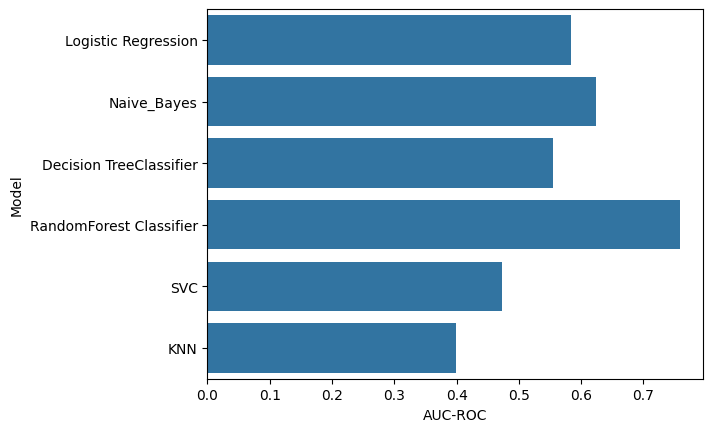

In [49]:
ax = sns.barplot(y="Model", x="AUC-ROC", data=predict)

In [50]:
best_model = predict.loc[predict['AUC-ROC'] == predict['AUC-ROC'].max()]
print("Best Model for Predicting Leads:")
print(best_model)


Best Model for Predicting Leads:
                     Model  Accuracy  F1-Score    Recall  Balanced Accuracy  \
3  RandomForest Classifier     0.765  0.113208  0.061224           0.527301   

    AUC-ROC  
3  0.758346  


In [51]:
import joblib
joblib.dump(rfc, 'rfc_model.pkl')

['rfc_model.pkl']

In [52]:
testing_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_mSzZ8RL.csv')

In [53]:
testing_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [54]:
testing_data['Serial_Number'] = range(1, len(testing_data) + 1)

In [55]:
testing_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Serial_Number
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,1
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,2
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,3
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,4
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,5
...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,105308
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,105309
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,105310
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,105311


In [64]:
testing_data_dup = testing_data.head(50000)
testing_data_dup

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Serial_Number
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,1
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,2
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,3
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,4
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,5
...,...,...,...,...,...,...,...,...,...,...,...
49995,QUWFUNG9,Male,38,RG270,Self_Employed,X1,25,No,528820,No,49996
49996,DXSAQEOM,Female,57,RG283,Self_Employed,X3,129,Yes,2383304,Yes,49997
49997,PHJGT23Q,Male,55,RG255,Self_Employed,X3,87,Yes,999861,Yes,49998
49998,JY4ZCA6Y,Male,59,RG283,Self_Employed,X3,43,Yes,1369843,No,49999


In [65]:
testing_data_dup = pd.get_dummies(testing_data_dup, drop_first=True)

In [66]:
missing_cols = set(x_train.columns) - set(testing_data.columns)
for col in missing_cols:
    testing_data_dup[col] = 0
testing_data_dup = testing_data_dup[x_train.columns]
testing_data_dup

<ipython-input-66-267154ead24f>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testing_data_dup[col] = 0
<ipython-input-66-267154ead24f>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testing_data_dup[col] = 0
<ipython-input-66-267154ead24f>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testin

,Age,Vintage,Avg_Account_Balance,Serial_Number,ID_245FELDT,ID_24TWNPYJ,ID_25GBTWNE,ID_26IVNPEJ,ID_26JMFBCU,ID_26QY7JID,...,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,29,25,742366,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,49,925537,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31,14,215949,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29,33,868070,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,19,657087,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,38,25,528820,49996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,57,129,2383304,49997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,55,87,999861,49998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,59,43,1369843,49999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
rfc_load = joblib.load('rfc_model.pkl')

In [68]:
final_pred = rfc_load.predict(testing_data_dup)
final_pred

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
submission = pd.DataFrame({'Serial_Number': testing_data_dup['Serial_Number'], 'Is_Lead': final_pred})
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv', index=True)